In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Set the styles to Seaborn
sns.set()
# Import the KMeans module so we can perform k-means clustering with sklearn
from sklearn.cluster import KMeans

In [12]:
data = pd.read_csv('GlobalLandTemperatures_GlobalLandTemperaturesByMajorCity.csv',error_bad_lines=False, index_col=False)

In [13]:
data

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63,-3.23
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63,-3.23
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63,-3.23
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63,-3.23
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63,-3.23
...,...,...,...,...,...,...,...
239172,5/1/2013,18.979,0.807,Xian,China,34.56,108.97
239173,6/1/2013,23.522,0.647,Xian,China,34.56,108.97
239174,7/1/2013,25.251,1.042,Xian,China,34.56,108.97
239175,8/1/2013,24.528,0.840,Xian,China,34.56,108.97


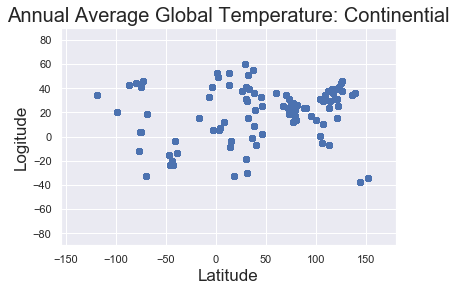

In [49]:
plt.scatter(data['Longitude'],data['Latitude'])
# Set limits of the axes, again to resemble the world map
plt.title("Annual Average Global Temperature: Continential", size=20)
plt.ylabel("Logitude", size=17)
plt.xlabel("Latitude", size=17)
plt.xlim(-155,180)
plt.ylim(-90,90)
plt.show()

In [32]:
x = data.iloc[:,5:7]

In [33]:
x

,Latitude,Longitude
0,5.63,-3.23
1,5.63,-3.23
2,5.63,-3.23
3,5.63,-3.23
4,5.63,-3.23
...,...,...
239172,34.56,108.97
239173,34.56,108.97
239174,34.56,108.97
239175,34.56,108.97


In [44]:
kmeans = KMeans(7)
#specify the number of clusters required

In [45]:
kmeans.fit(x)
# model is made ready for the clustering and labelling the clusters

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [46]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([3, 3, 3, ..., 4, 4, 4])

In [47]:
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Cluster
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63,-3.23,3
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63,-3.23,3
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63,-3.23,3
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63,-3.23,3
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63,-3.23,3
...,...,...,...,...,...,...,...,...
239172,5/1/2013,18.979,0.807,Xian,China,34.56,108.97,4
239173,6/1/2013,23.522,0.647,Xian,China,34.56,108.97,4
239174,7/1/2013,25.251,1.042,Xian,China,34.56,108.97,4
239175,8/1/2013,24.528,0.840,Xian,China,34.56,108.97,4


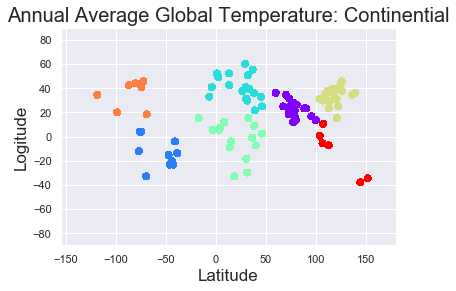

In [50]:
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Cluster'],cmap='rainbow')
plt.title("Annual Average Global Temperature: Continential", size=20)
plt.ylabel("Logitude", size=17)
plt.xlabel("Latitude", size=17)
plt.xlim(-155,180)
#xlim - x axis limit
plt.ylim(-90,90)
#ylim - y axis limit
plt.show()